# UD3
#### UD3. Aprendizaxe Non Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Cristina Gómez Alonso

Entrega en el moodle el fichero notebook solución así como un pdf generado con el contenido del notebook y su ejecución.

### Dataset: Países

Nuestro gallego de oro, Amancio Ortega, ha cumplido 87 años y le da vueltas a cuál será su legado en este mundo.
Es por ello, que ha contactado con el IES de Teis para que le ayudemos a identicar aquellos países más necesitados teniendo en cuenta factores socio-económicos y de salud para determinar el estado de cada país.
Una vez categorizados, la Fundación Ortega podrá abrir hospitales, escuelas y comedores sociales en dichos países.

Disponemos de un dataset con la información mundial de 166 países.

Lista de atributos para cada país:

* país: nombre del país
* mort_inf: número de niños menores de 5 años muertos por cada 1000 nacimientos
* exportaciones: exportaciones de bienes y servicios per cápita. Expresado como % del PIB per cápita
* salud: gasto total en salud per cápita. Expresado como % del PIB per cápita
* importaciones: importaciones de bienes y servicios per cápita. Expresado como % del PIB per cápita
* ingresos: ingresos netos por persona
* inflacion: la medida de la tasa de crecimiento anual del PIB total
* esp_vida: La cantidad promedio de años que viviría un niño recién nacido si los patrones de mortalidad actuales se mantuvieran iguales
* num_hijos: el número de hijos que nacerían de cada mujer si las tasas actuales de fecundidad por edad se mantuvieran iguales.
* pib: el PIB per cápita. Calculado como el PIB total dividido por la población total.

A Amancio no le interesan mucho los números ni las gráficas, sino que le extraigas conclusiones de cada uno de los pasos qué realizas y porqué los realizas.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
from yellowbrick.cluster import SilhouetteVisualizer
warnings.filterwarnings("ignore")




## 1. Importación del dataset

In [ ]:
import pandas as pd
df_paises = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/abelsdb/ML/3ºEvaluación/3.4Proyecto3ºeva/data/paises.csv', sep=',')


In [ ]:
df_paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pais           167 non-null    object 
 1   mort_inf       167 non-null    float64
 2   exportaciones  167 non-null    float64
 3   salud          167 non-null    float64
 4   importaciones  167 non-null    float64
 5   ingresos       167 non-null    int64  
 6   inflacion      167 non-null    float64
 7   esp_vida       167 non-null    float64
 8   num_hijos      167 non-null    float64
 9   pib            167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
if df_paises['pais'].nunique() == len(df_paises):
    print('No hay valores duplicados en la columna "pais"')
else:
    print('Hay valores duplicados en la columna "pais"')

No hay valores duplicados en la columna "pais"


## 2. EDA&Preprocessing (2 puntos)

In [ ]:

df_paises.describe()

,mort_inf,exportaciones,salud,importaciones,ingresos,inflacion,esp_vida,num_hijos,pib
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


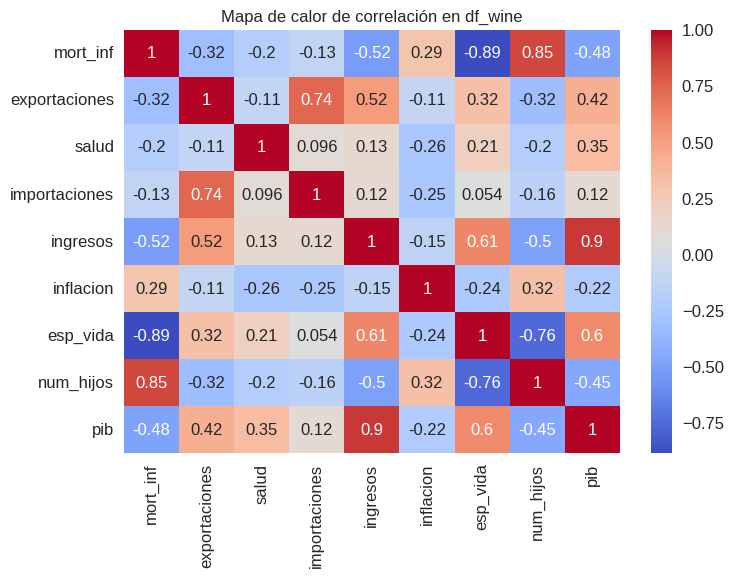

In [ ]:

# Crear un mapa de calor de correlación
sns.heatmap(df_paises.corr(), annot=True, cmap="coolwarm")  # Mapa de calor
plt.title("Mapa de calor de correlación en df_wine")
plt.show()


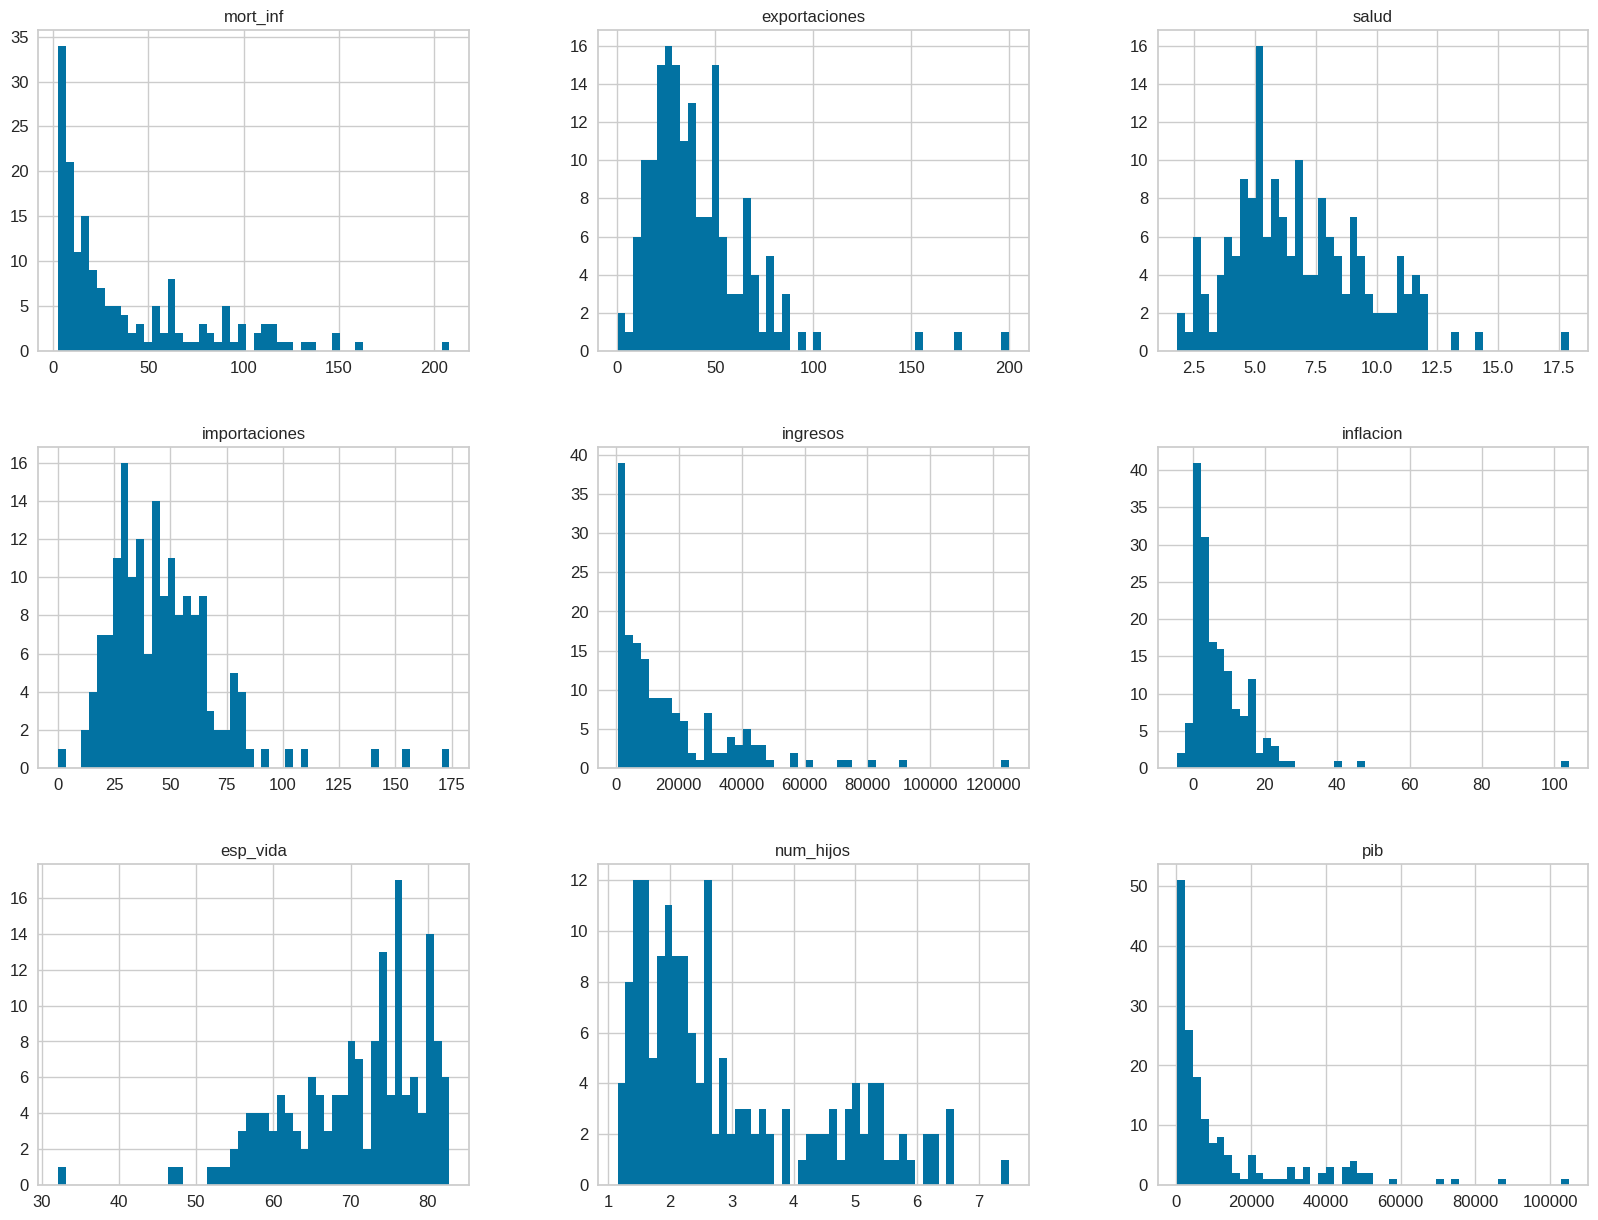

In [ ]:
#gráfica de la función de distribución de cada caracteristica
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
df_paises.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# Realiza un análisis exploratorio de los datos. ¿Puedes extraer alguna información?
# Realiza un preprocesado de los datos antes de pasar el siguiente apartado




Observo claramente bastantes outlayers ( valores muy alejados de la desviación típica ) en las diferentes categorias  , infiero que precisamente los paises con mayor desviación típica
en terminos negativos en esas categorias relacionadas con la salud y la bonanza económica serán los que tendré que agrupar .

Correlaciones positivas :

Observo que como era de esperar que  hay una alta correlación entre PIB e Ingresos y entre estos dos parametros y la esperanza de vida .
Entre numero de numero  de hijos y mortalidad infantil tambien hay una correlación muy alta .
Tambien cabe señalar la mayor relacón de la salud con el PIB que con los ingresos personales siendo esta la única diferencia de peso
con el resto de variables.

Correlaciones negativas :

Como es de esperar la mortalidad infantil tiene una altisima correlación con la esperanza de vida y menos alta con los ingresos y el PIB


En cuanto al preprocesing .

No voy a eliminar los outlayers ya que que me va a dar información , no hay nulos ni duplicados , simplemente escalaré los datos para facilitar su tratamiento y eliminaré la categoría nombre ya que no deja de ser un indice .





In [ ]:
df_sinpaises = df_paises.copy()
y = df_sinpaises.pop('pais')
X = df_sinpaises

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)



## 3. Creación de los modelos, entrenamiento, predicciones y representación gráfica (4 puntos)

In [ ]:
# Crea al menos un modelo no supervisado, entrénalo y visualiza los resultados. ¿Cuál es el número óptimo de clústers? ¿Por qué? Qué conclusiones extraemos?

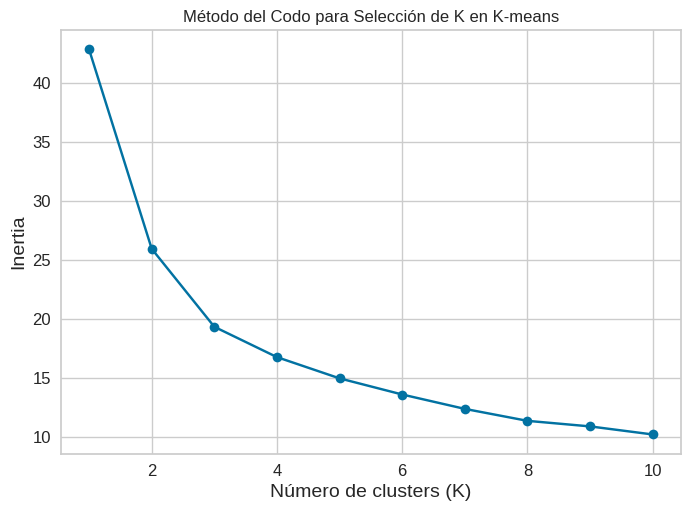

In [ ]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    inertia = kmeans.inertia_
    inertias.append(inertia)

# Graficar la evolución de la inercia en función de K
plt.plot(range(1, 11), inertias, '-o')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inertia')
plt.title('Método del Codo para Selección de K en K-means')
plt.show()


In [ ]:
labels = kmeans.labels_
silhouette_score(X_scaled, labels)
scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_, metric='euclidean')
    scores.append(score)



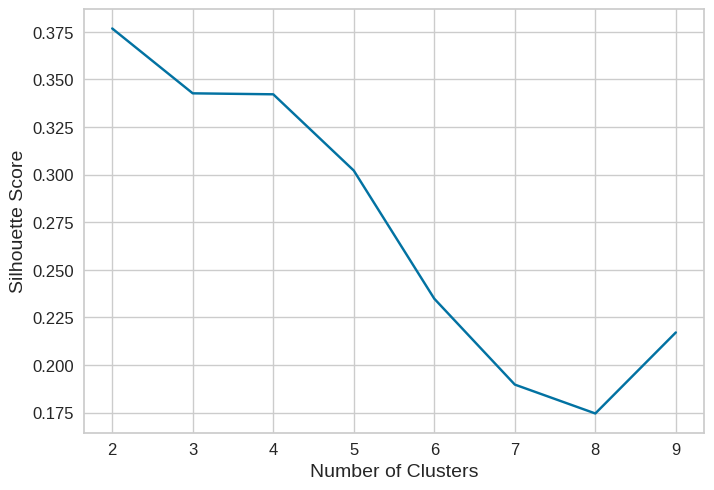

In [ ]:
plt.plot(list(range(2, 10)), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

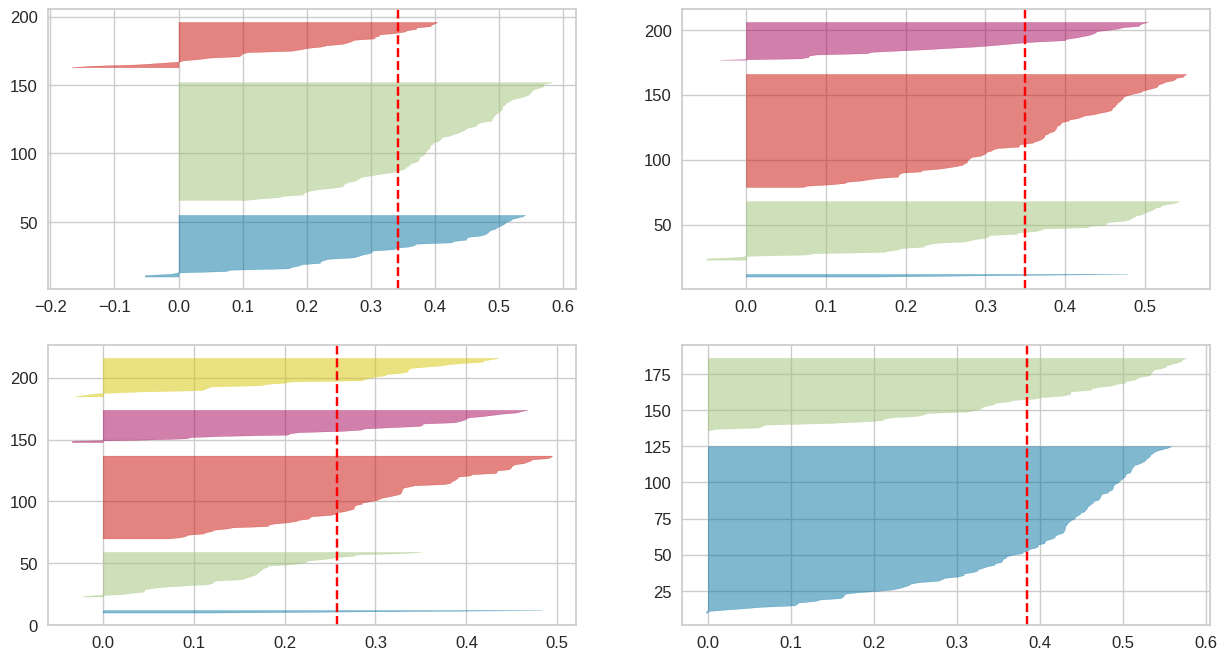

In [ ]:
# Generamos una vista de los distintos Silhouette score en función de K
# Genera un subplot por cada uno de los clústeres generados
# Genera scores para 2, 3, 4 y 5 Ks

fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2,3,4,5]:
    # Creamos una instancia del modelo K-Means en función del valor de K
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    kmeans.fit(X_scaled)

    q, mod = divmod(i-1, 2)
    # Creamos una instancia de "SilhouetteVisualizer" con la instancia KMeans anterior
    # Alimentamos el visualizador
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_scaled)

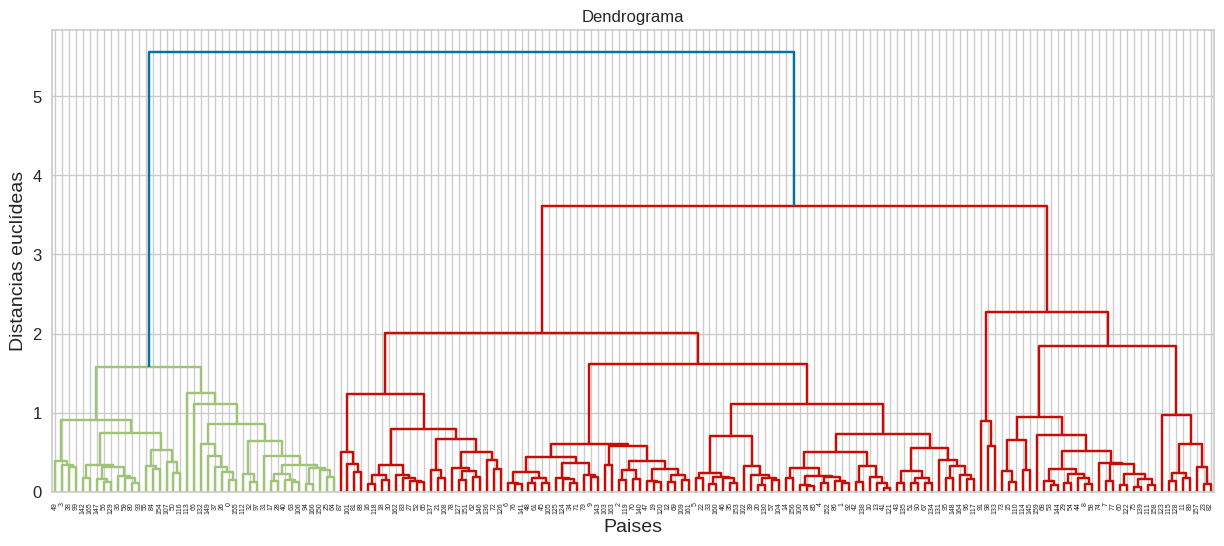

In [ ]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
plt.title('Dendrograma')
plt.xlabel('Paises')
plt.ylabel('Distancias euclídeas')
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method = 'ward'))
plt.show()

Tras usar diferentes metricas para determinar el número de clusters adecuado , me parece que la elección de 3 está más balanceada y me va a dar más información que 2 aunque viendo el dendograma esa división extra no me la va a dar del grupo que estoy buscando , con 4 grupos es cierto que en siluhete visualizer el resultado de su algoritmo se acerca un poco más a 1 que es lo correcto pero ese grupo extra apenas tiene 3 miembros y no los separa del grupo de busqueda

In [ ]:
# Crear modelo K-means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Entrenar modelo con datos del dataset
kmeans.fit(X_scaled)

# Obtener las etiquetas de cluster asignadas a cada punto
labels = kmeans.labels_

# Obtener las coordenadas de los centroides de cada cluster
C = kmeans.cluster_centers_


En este caso no creo que haya que predecir nuevos casos , pero por si un día se independiza Escocia o Quebec aquí dejo como se le asignaría un grupo



```
# y_pred = kmeans.fit_predict(X)
```



In [ ]:
df_paises['cluster'] = labels
df_paises.head()

,pais,mort_inf,exportaciones,salud,importaciones,ingresos,inflacion,esp_vida,num_hijos,pib,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [ ]:
grupos = df_paises['cluster'].unique()

# Crear un diccionario para almacenar los DataFrames separados por cluster
df_dict = {}

# Iterar sobre los clusters y crear los DataFrames separados por cluster
for grupo in grupos:
    df_dict[grupo] = df_paises[df_paises['cluster'] == grupo]



In [ ]:
for i in range(3) :
 display(df_dict[i].describe())


,mort_inf,exportaciones,salud,importaciones,ingresos,inflacion,esp_vida,num_hijos,pib,cluster
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0
mean,93.284783,29.287174,6.338478,43.297826,3516.804348,12.097065,59.393478,5.090217,1695.913043,0.0
std,34.079410,18.479530,2.668183,18.636362,5391.402727,15.670791,6.473859,0.940327,2795.655748,0.0
min,28.100000,2.200000,2.200000,17.200000,609.000000,0.885000,32.100000,3.150000,231.000000,0.0
25%,64.625000,16.875000,4.515000,30.225000,1390.000000,3.940000,56.925000,4.570000,548.500000,0.0
50%,90.250000,23.800000,5.480000,41.500000,1835.000000,8.995000,60.250000,5.085000,833.000000,0.0
75%,111.000000,38.800000,7.845000,49.525000,3310.000000,16.600000,62.875000,5.672500,1310.000000,0.0
max,208.000000,85.800000,13.100000,101.000000,33700.000000,104.000000,71.100000,7.490000,17100.000000,0.0


,mort_inf,exportaciones,salud,importaciones,ingresos,inflacion,esp_vida,num_hijos,pib,cluster
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.0
mean,22.248276,40.795276,6.245172,47.286964,12913.678161,7.527138,72.616092,2.283333,6833.356322,1.0
std,14.470434,19.364753,2.168167,19.811400,8631.565397,7.751148,4.552277,0.662370,5238.844862,0.0
min,4.500000,0.109000,1.970000,0.065900,1990.000000,-4.210000,54.300000,1.250000,592.000000,1.0
25%,11.350000,26.900000,4.885000,31.900000,6720.000000,2.355000,70.100000,1.740000,2980.000000,1.0
50%,18.100000,37.600000,5.980000,48.700000,10900.000000,5.880000,73.700000,2.230000,5080.000000,1.0
75%,29.150000,51.500000,7.525000,60.250000,17250.000000,9.905000,76.050000,2.655000,9685.000000,1.0
max,64.400000,93.800000,14.200000,108.000000,45400.000000,45.900000,80.400000,4.340000,28000.000000,1.0


,mort_inf,exportaciones,salud,importaciones,ingresos,inflacion,esp_vida,num_hijos,pib,cluster
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.0
mean,4.835294,57.905882,8.921176,50.735294,46408.823529,2.595294,80.385294,1.750294,43897.058824,2.0
std,2.130711,43.025320,3.201922,37.658706,21148.656633,4.098247,1.504364,0.373383,18595.152273,0.0
min,2.600000,12.400000,1.810000,13.600000,27200.000000,-3.220000,76.500000,1.150000,19800.000000,2.0
25%,3.450000,29.300000,7.797500,28.200000,32850.000000,0.424000,79.825000,1.445000,31525.000000,2.0
50%,4.200000,49.800000,9.485000,37.400000,40550.000000,1.190000,80.400000,1.815000,41850.000000,2.0
75%,5.100000,66.525000,10.925000,61.550000,48475.000000,3.520000,81.400000,1.945000,48625.000000,2.0
max,10.800000,200.000000,17.900000,174.000000,125000.000000,16.700000,82.800000,3.030000,105000.000000,2.0


Claramente nuestro grupo de estudio será el cluster 0 , observando los estadisticos de los diferentes grupos los niveles de pobreza en todo su ambito son muy alarmantes

In [ ]:
display (df_dict[0])
df10 = (df_dict[0])

,pais,mort_inf,exportaciones,salud,importaciones,ingresos,inflacion,esp_vida,num_hijos,pib,cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,0
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,0
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,0
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,0
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,0


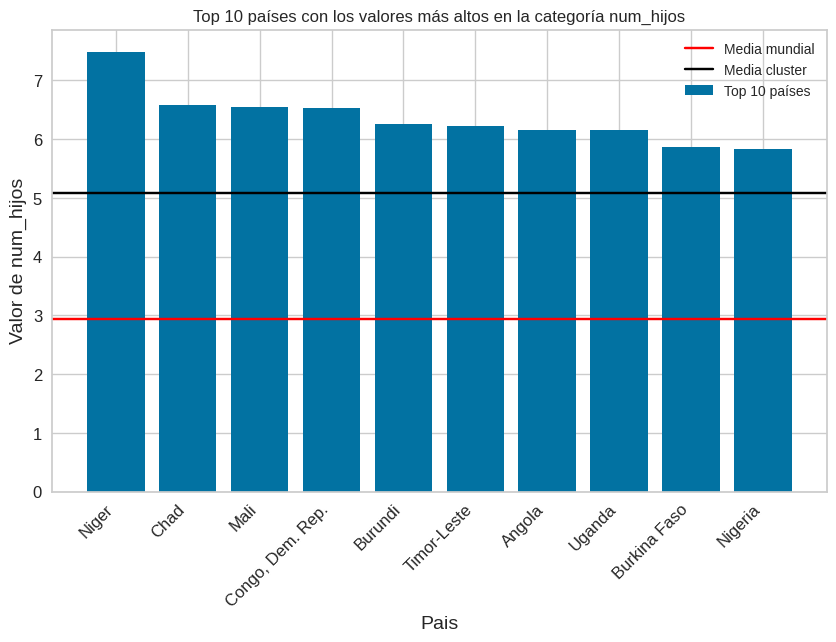

In [ ]:
# Seleccionar los 10 países con los valores más altos en la columna "num_hijos"
top_values = df10.nlargest(10, "num_hijos")

# Calcular la media mundial
media_mundial = df_paises["num_hijos"].mean()
media_cluster = df10["num_hijos"].mean()
# Crear un histograma con los valores obtenidos
plt.bar(top_values["pais"], top_values["num_hijos"], label="Top 10 países")
plt.axhline(media_mundial, color="red", label="Media mundial")
plt.axhline(media_cluster, color="black", label="Media cluster")
plt.title("Top 10 países con los valores más altos en la categoría num_hijos")
plt.xlabel("Pais")
plt.ylabel("Valor de num_hijos")
plt.xticks(rotation=45, ha="right")
plt.gcf().set_size_inches(10, 6)
plt.legend()
plt.show()

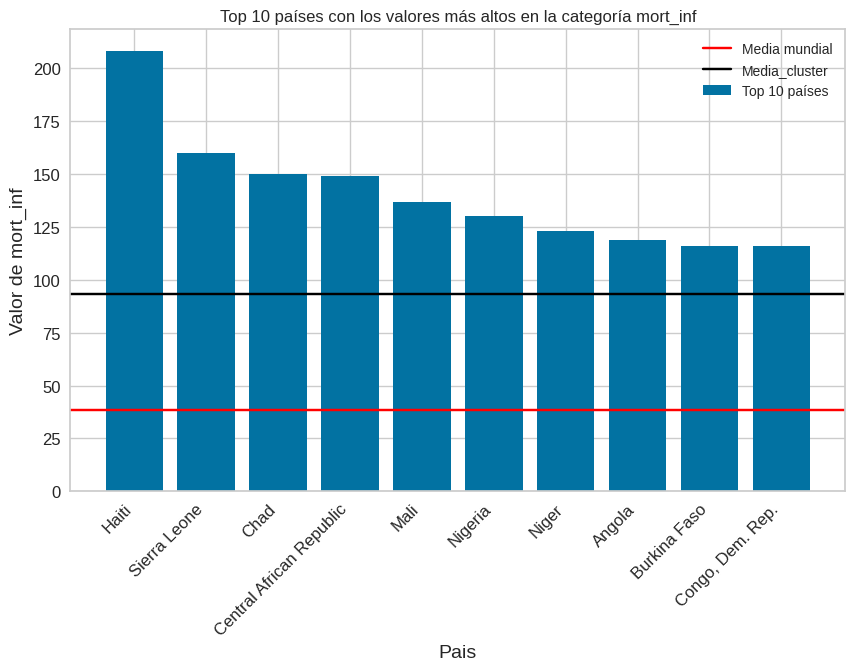

In [ ]:
# Seleccionar los 10 países con los valores más altos en la columna "mort_inf"
top_values = df10.nlargest(10, "mort_inf")

# Calcular la media mundial
media_mundial = df_paises["mort_inf"].mean()
media_cluster = df10["mort_inf"].mean()
# Crear un histograma con los valores obtenidos
plt.bar(top_values["pais"], top_values["mort_inf"], label="Top 10 países")
plt.axhline(media_mundial, color="red", label="Media mundial")
plt.axhline(media_cluster, color="black", label="Media_cluster")
plt.title("Top 10 países con los valores más altos en la categoría mort_inf")
plt.xlabel("Pais")
plt.ylabel("Valor de mort_inf")
plt.xticks(rotation=45, ha="right")
plt.gcf().set_size_inches(10, 6)
plt.legend()
plt.show()

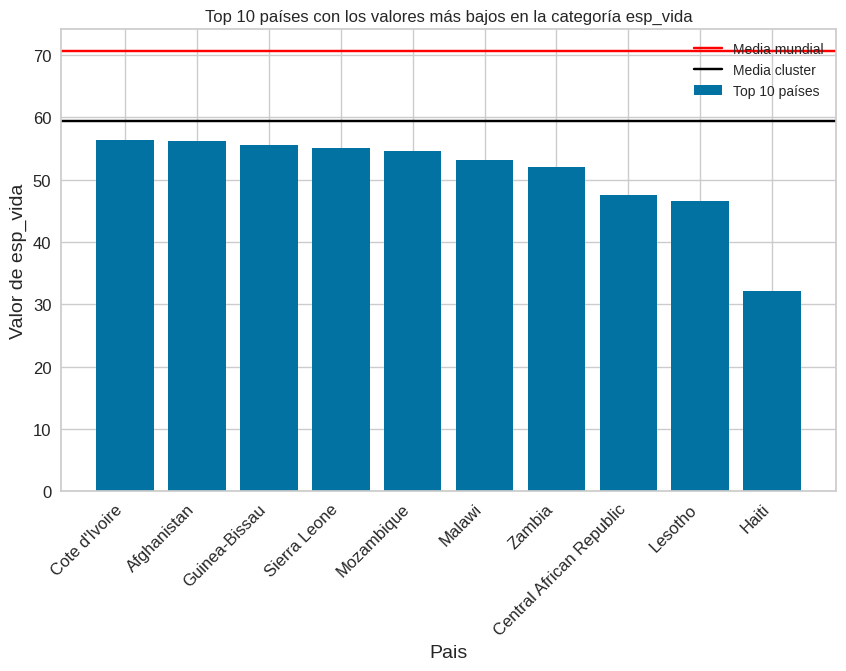

In [ ]:

# Seleccionar los 10 países con los valores más bajos en la columna "esp_vida"
top_values = df10.nsmallest(10, "esp_vida").sort_values("esp_vida", ascending=False)

# Calcular la media mundial
media_mundial = df_paises["esp_vida"].mean()
media_cluster = df10["esp_vida"].mean()
# Crear un histograma con los valores obtenidos
plt.bar(top_values["pais"], top_values["esp_vida"], label="Top 10 países")
plt.axhline(media_mundial, color="red", label="Media mundial")
plt.axhline(media_cluster, color="black", label="Media cluster")
plt.title("Top 10 países con los valores más bajos en la categoría esp_vida")
plt.xlabel("Pais")
plt.ylabel("Valor de esp_vida")
plt.xticks(rotation=45, ha="right")
plt.gcf().set_size_inches(10, 6)
plt.legend()
plt.show()


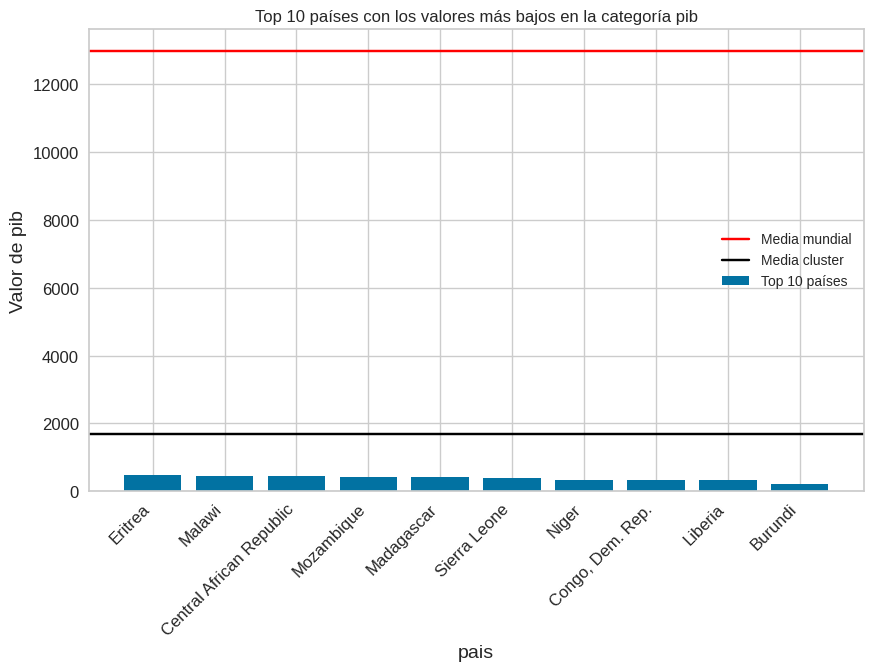

In [ ]:
# Seleccionar los 10 países con los valores más bajos en la columna "pib"
top_values = df10.nsmallest(10, "pib").sort_values("pib", ascending=False)


# Calcular la media mundial
media_mundial = df_paises["pib"].mean()
media_cluster = df10["pib"].mean()


# Crear un histograma con los valores obtenidos
plt.bar(top_values["pais"], top_values["pib"], label="Top 10 países")
plt.axhline(media_mundial, color="red", label="Media mundial")
plt.axhline(media_cluster, color="black", label="Media cluster")
plt.title("Top 10 países con los valores más bajos en la categoría pib")
plt.xlabel("pais")
plt.ylabel("Valor de pib")
plt.xticks(rotation=45, ha="right")
plt.gcf().set_size_inches(10, 6)
plt.legend()
plt.show()

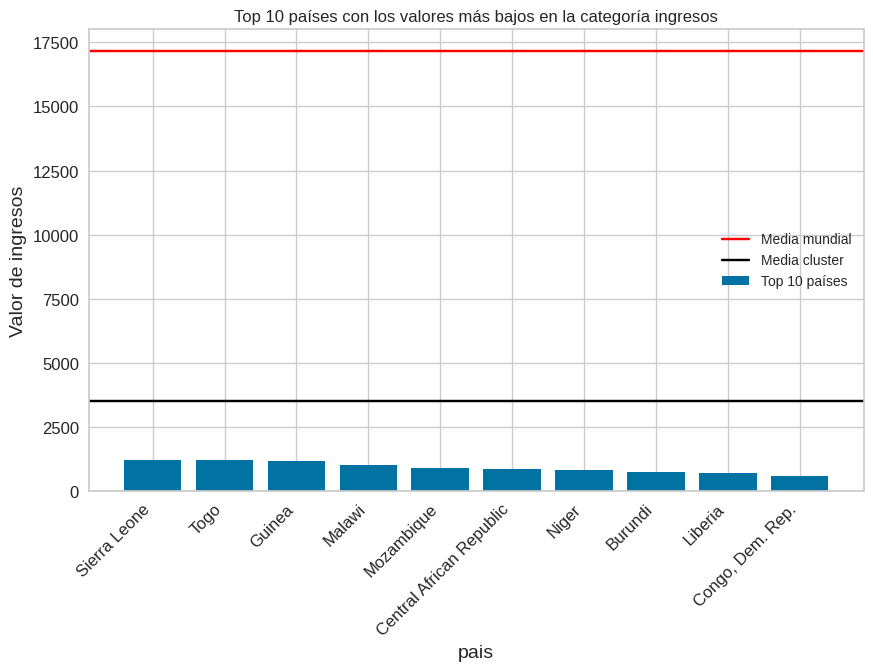

In [ ]:
# Seleccionar los 10 países con los valores más bajos en la columna "ingresos"
top_values = df10.nsmallest(10, "ingresos").sort_values("ingresos", ascending=False)


# Calcular la media mundial
media_mundial = df_paises["ingresos"].mean()
media_cluster = df10["ingresos"].mean()


# Crear un histograma con los valores obtenidos
plt.bar(top_values["pais"], top_values["ingresos"], label="Top 10 países")
plt.axhline(media_mundial, color="red", label="Media mundial")
plt.axhline(media_cluster, color="black", label="Media cluster")
plt.title("Top 10 países con los valores más bajos en la categoría ingresos")
plt.xlabel("pais")
plt.ylabel("Valor de ingresos")
plt.xticks(rotation=45, ha="right")
plt.gcf().set_size_inches(10, 6)
plt.legend()
plt.show()

## 4. PCA (2 puntos)

In [ ]:
# ¿Tiene sentido la reducción de dimensionalidad de este dataset? Demúestralo y justifica tus respuestas.
pca_RF = PCA(n_components = 0.95)
X_reducida = pca_RF.fit_transform(X_scaled)
pca_RF.n_components_



6

In [ ]:
pca_RF.explained_variance_ratio_

array([0.55001227, 0.13384784, 0.12301053, 0.09749047, 0.03777964,
       0.03013659])

In [ ]:
# Crear un DataFrame con las importancias de las características sobre el primer componente .
importances = pd.Series(pca_RF.components_[0], index=X.columns)

importances_sorted = importances.sort_values(ascending=False)


print(importances_sorted)

esp_vida         0.420535
pib              0.338243
ingresos         0.306981
exportaciones    0.170333
salud            0.133886
importaciones    0.081620
inflacion       -0.088009
mort_inf        -0.476463
num_hijos       -0.571087
dtype: float64


Esta es la relación que te comentaba entre los componentes y el peso que tiene cada categoría en la explicación de su varianza no se si está bien , esto da la explicación del componente 1 que a su vez explica el 55% de la varianza

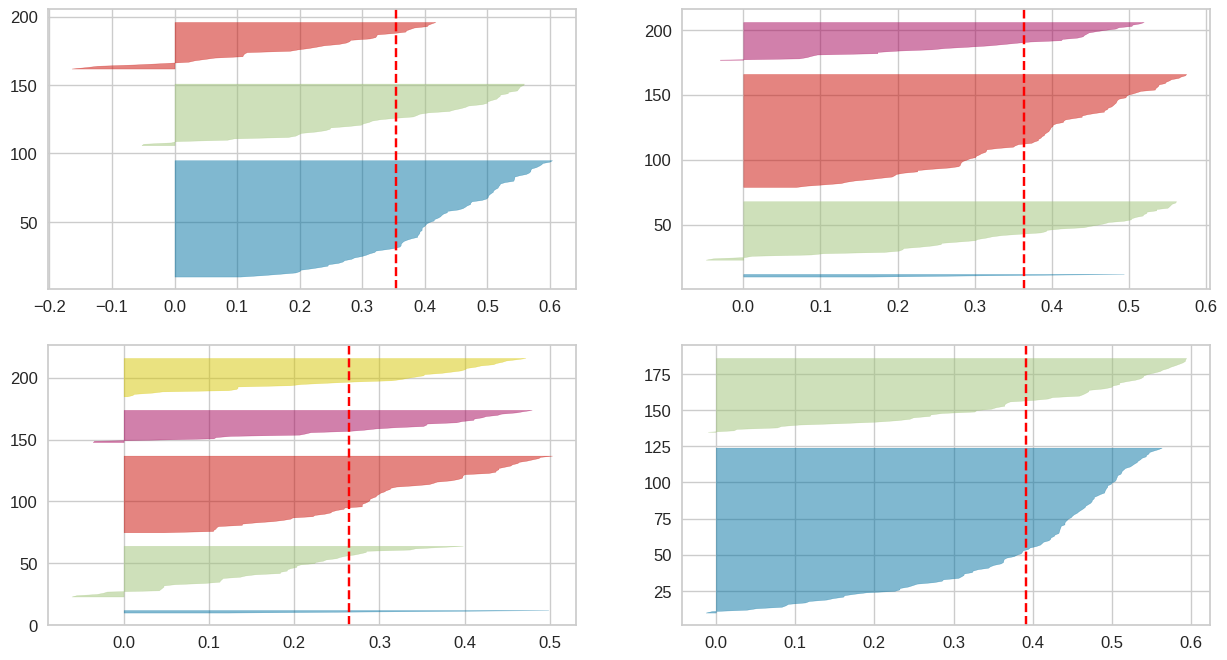

In [ ]:
# Generamos una vista de los distintos Silhouette score en función de K
# Genera un subplot por cada uno de los clústeres generados
# Genera scores para 2, 3, 4 y 5 Ks

fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2,3,4, 5]:
    # Creamos una instancia del modelo K-Means en función del valor de K
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)


    q, mod = divmod(i-1, 2)
    # Creamos una instancia de "SilhouetteVisualizer" con la instancia KMeans anterior
    # Alimentamos el visualizador
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_reducida)

Con PCA puedo reducir la dimensionalidad del conjunto de datos a 6 con una relación de varianza explicada del 95%


1.  Simplificación de datos: La reducción de la dimensionalidad del conjunto de datos a solo 6 componentes principales no simplifica la representación de los datos . Al no representar los componentes a las caracteristicas originales esto no da ninguna ventaja a la hora de dar información sobre el analisis de datos .
2.  Mejora de la eficiencia computacional: Al reducir la dimensionalidad del conjunto de datos, también se puede reducir la cantidad de recursos computacionales necesarios para procesar y analizar los datos. Esto puede resultar en un mayor rendimiento en términos de tiempo de procesamiento y memoria requerida, lo que puede ser beneficioso , En nuestro caso al ser el dataset tan pequeño no es un argumento a tener en cuenta.
3.   La gráfica SilhouetteVisualizer apenas mejora su distribución en los clusters recomendados frente a la misma gráfica sin PCA .





In [ ]:
# Crear modelo K-means con 3 clusters
kmeans_pca = KMeans(n_clusters=3, random_state=42)

# Entrenar modelo con datos del dataset
kmeans_pca.fit_transform(X_reducida)

# Obtener las etiquetas de cluster asignadas a cada punto
labels_pca = kmeans_pca.labels_

# Obtener las coordenadas de los centroides de cada cluster
centroids = kmeans_pca.cluster_centers_


In [ ]:

df_paises_pca  = df_paises.copy()
df_paises_pca['cluster_pca'] = labels_pca
df_paises_pca

,pais,mort_inf,exportaciones,salud,importaciones,ingresos,inflacion,esp_vida,num_hijos,pib,cluster,cluster_pca
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,1


In [ ]:
grupos_pca = df_paises_pca['cluster_pca'].unique()

# Crear un diccionario para almacenar los DataFrames separados por cluster
df_dict_pca = {}

# Iterar sobre los clusters y crear los DataFrames separados por cluster
for grupo in grupos_pca:
    df_dict_pca[grupo] = df_paises_pca[df_paises_pca['cluster_pca'] == grupo]


In [ ]:
df_dict_pca[1]


,pais,mort_inf,exportaciones,salud,importaciones,ingresos,inflacion,esp_vida,num_hijos,pib,cluster,cluster_pca
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0,1
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,0,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,0,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,0,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,0,1
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,0,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,0,1
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,0,1
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,0,1
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,0,1


Vemos que la agrupación en PCA cambio los numeros de los cluster pero no su distribución

Aprobechando PCA , voy a realizar algunas graficas de los agrupamientos con menos componentes

In [ ]:
pca_RF2 = PCA(n_components = 2)
X_reducida2 = pca_RF2.fit_transform(X_scaled)
pca_RF2.n_components_
pca_RF2.explained_variance_ratio_


array([0.55001227, 0.13384784])

In [ ]:
# Crear modelo K-means con 3 clusters
kmeans_pca2 = KMeans(n_clusters=3, random_state=42)

# Entrenar modelo con datos del dataset
kmeans_pca2.fit_transform(X_reducida2)

# Obtener las etiquetas de cluster asignadas a cada punto
labels_pca2 = kmeans_pca2.labels_

# Obtener las coordenadas de los centroides de cada cluster
centroids2 = kmeans_pca2.cluster_centers_

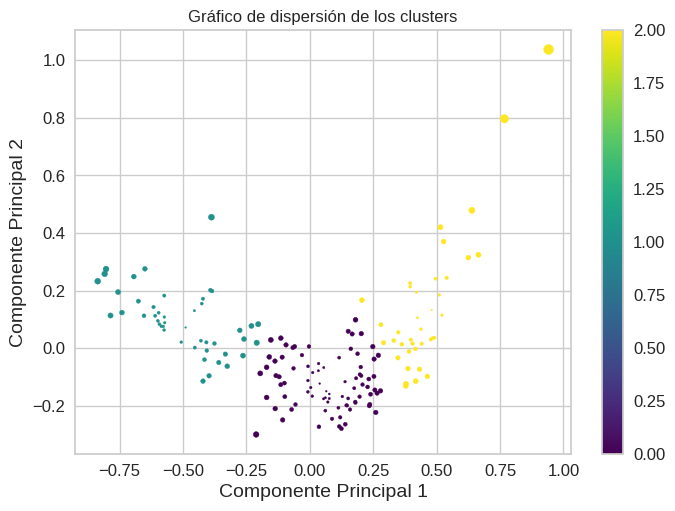

In [ ]:
# Crear un DataFrame a partir de los datos reducidos por PCA y agregar las etiquetas de cluster y la distancia al centroide
df_clusters = pd.DataFrame(X_reducida2, columns=["PC1", "PC2"])
df_clusters["cluster"] = labels_pca2
df_clusters["dist_to_center"] = kmeans_pca2.transform(X_reducida2).min(axis=1)

# Crear una gráfica de dispersión
plt.scatter(x=df_clusters["PC1"], y=df_clusters["PC2"], c=df_clusters["cluster"], cmap="viridis", s=df_clusters["dist_to_center"]*50)
plt.title("Gráfico de dispersión de los clusters")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")


plt.colorbar()
plt.show()

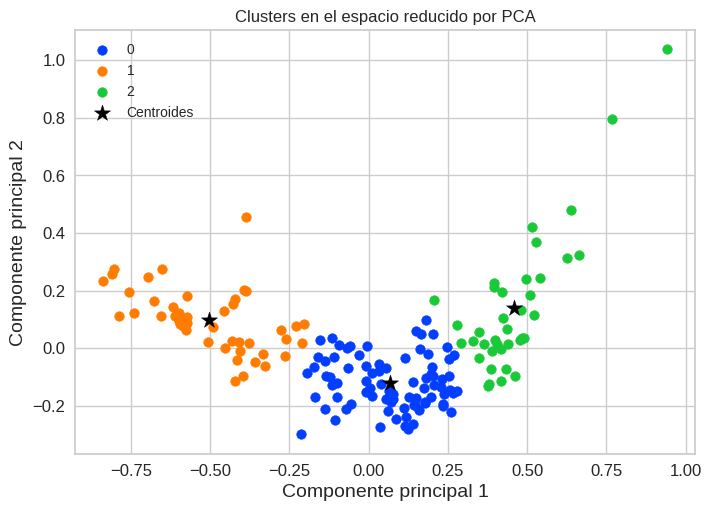

In [ ]:
colors = sns.color_palette('bright', n_colors=3)
for label, color in zip(np.unique(labels_pca2), colors):
    plt.scatter(X_reducida2[labels_pca2 == label, 0], X_reducida2[labels_pca2 == label, 1], color=color, label=label)
plt.scatter(centroids2[:, 0], centroids2[:, 1], marker="*", color="black", s=150, label="Centroides")
plt.title("Clusters en el espacio reducido por PCA")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.show()


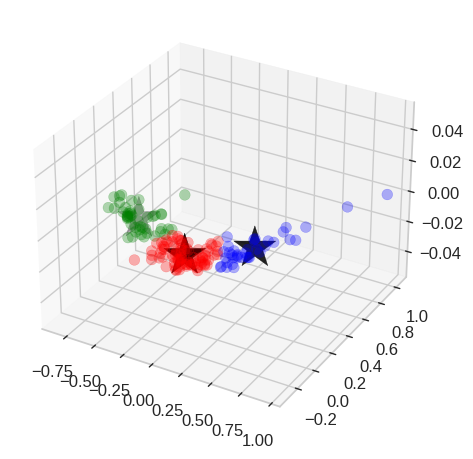

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Lista de colores personalizados
colores = ['red', 'green', 'blue']

# Asignar colores personalizados a cada punto de datos en labels_pca2
colors_personalizados = [colores[label] for label in labels_pca2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Utilizar los colores personalizados en el método scatter
ax.scatter(X_reducida2[:, 0], X_reducida2[:, 1], c=colors_personalizados, s=60, alpha=0.3)
ax.scatter(centroids2[:, 0], centroids2[:, 1], c='black', marker='*', s=1000, zorder=10)

plt.show()


## 5. Conclusiones (2 puntos)

In [ ]:
!pip install kaleido
import plotly.express as px
import kaleido
df_paises['cluster'].loc[df_paises['cluster'] == 0] = 'Grupo objeto'
df_paises['cluster'].loc[df_paises['cluster'] == 1] = 'Cluster 1'
df_paises['cluster'].loc[df_paises['cluster'] == 2] = 'Cluster 2'
fig = px.choropleth(df_paises[['pais','cluster']],
                    locationmode = 'country names',
                    locations = 'pais',
                    title = 'Distribución geografica',
                    color = df_paises['cluster'],
                    color_discrete_map = {'Grupo objeto':'red',
                                          'Cluster 1':'green',
                                          'Cluster 2':'orange'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Etiquetas',legend_title_side ='top',title_pad_l = 260,title_y = 0.86)
fig.update_layout(width=1200, height=700)

fig.show(engine = 'kaleido')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# ¿Qué información le podemos hacer llegar a Amancio?

Pues a Amancio le podemos decir que el conjunto de paises que le proponemos para que pueda implantar esa batería de medidas está bien definido y separado del resto de países del mundo en cuanto a niveles de prosperidad .

Tambien cabe destacar que dentro del grupo objeto de este estudio hay cierta desviación de algunos países frente a la media de su grupo en las categorías estudiadas , siendo importante esto a la hora de los recursos a invertir en cada país ya que algunos están más necesitados a la hora de solventar ciertas carencias .

La mayoría de los países de estudio se encuentran en Africa , habiendo sufrido durante decadas guerras civiles , gobiernos dictatoriales y corrupción generalizada , siendo esto importante a la hora de destinar los recursos si estos fueran escasos , quizas un pais con un PIB que no se correlaciona bien con los ingresos por habitante es un indicativo de esto último .

La violencia armada es un problema  que afecta a muchos de estos países y que no parece que vaya a tener solución a corto plazo .

La mortalidad infantil es demasiada en estos países siendo la natalidad muy alta y generando ciertas dudas de si esta natalidad alta es una medida de supervivencia de la población o por el contrario se puede tildar de irresponsable .


Mi recomendación es que dentro del grupo objeto hay que estudiar la singulariadad de cada país , saber en que puede ser necesaria la ayuda y donde puede ser más efectiva teniendo que conocer más la realidad social de cada país , algo que se escapa del proposito de esta agrupación pero no deja de ser importante .


En Vigo

A 28 de Abril del 2023

Abel Araujo Alvarez

